# Customer Segmentation - K-Means Analysis

# Libraries imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

First let's explore the dataset first

In [3]:
df = pd.read_csv(r'D:\python\Ds\New folder\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.duplicated().sum()

0

No need to clean the dataset

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---

# Data exploration and visualization

Plot pairwise relationships between features in a dataset.

<Figure size 1600x1000 with 0 Axes>

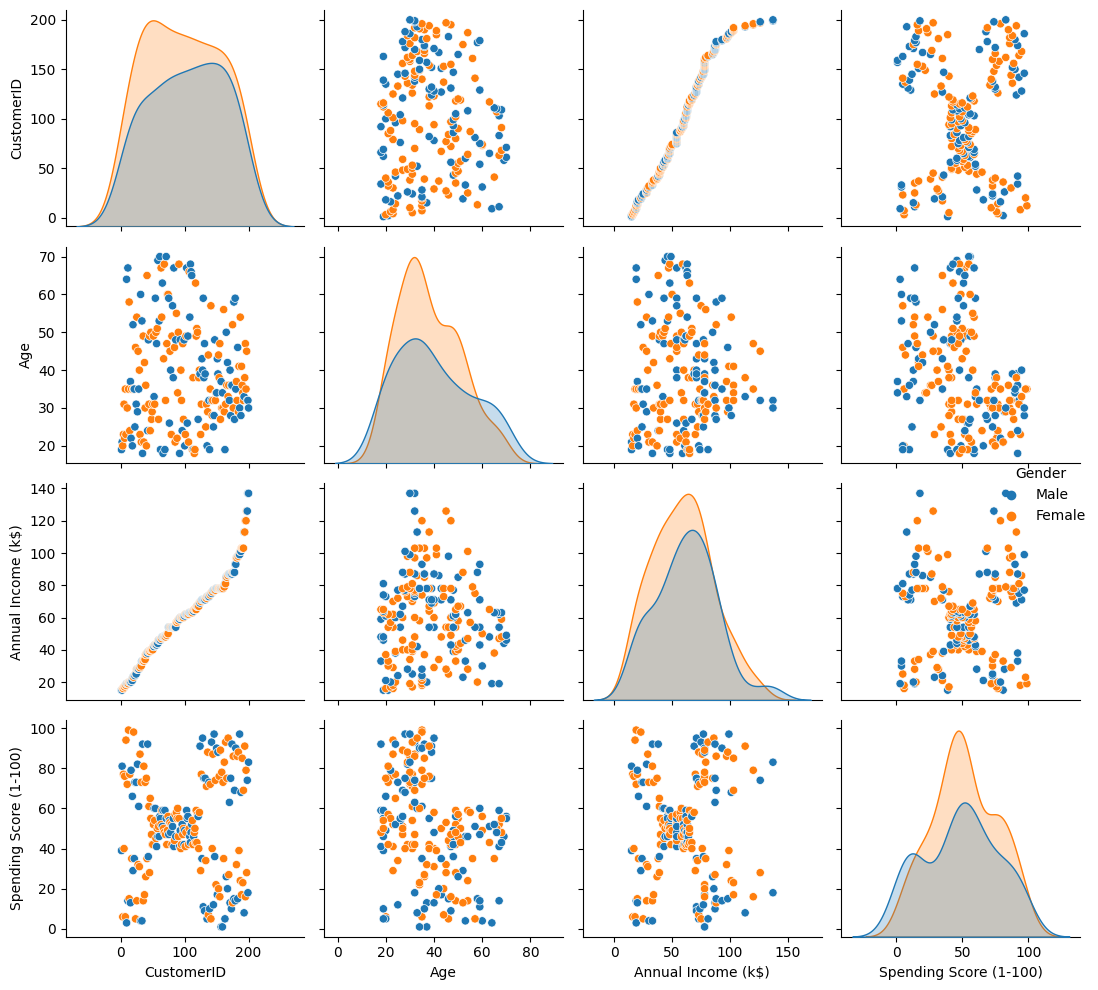

In [39]:
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.tight_layout()
plt.show()

Number of male vs female

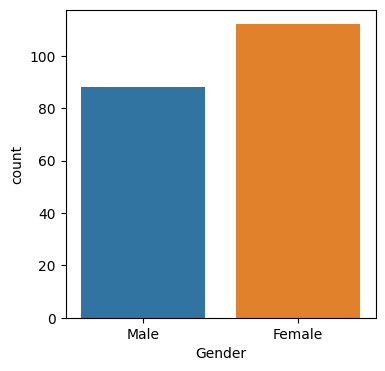

In [9]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

Distribution of numerical features (Age, Annual income & Spending score)

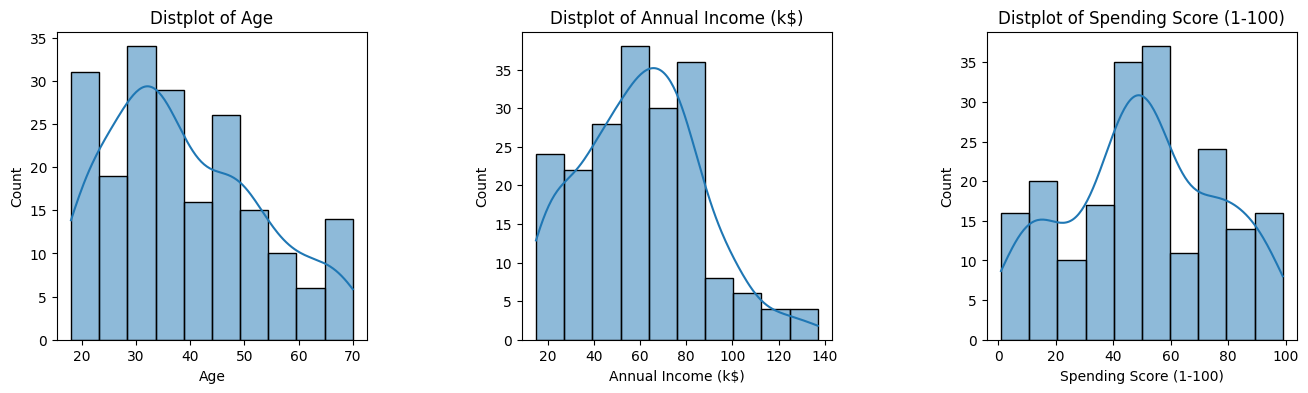

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(16, 4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=10, kde=True)  # Using histplot instead of distplot
    plt.title(f'Distplot of {x}')
plt.show()


---

# Clustering using K- means

## ML model

__Concept__

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

__How the K-means algorithm works__

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.

__Optimal K: the elbow method__

How many clusters would you choose ?


A common, empirical method, is the elbow method. You plot the mean distance of every point toward its cluster center, as a function of the number of clusters.

Sometimes the plot has an arm shape, and the elbow would be the optimal K.

<img src="input/elbow.png" style="height:300px">

Warning: this method does not apply all the time: sometimes you don't have a clear elbow! In any case, you have to check on the data how is the clustering and make sure it makes sense.

## Application in this use-case

Let's perform clustering (optimizing K with the elbow method). In order to simplify the problem, we start by keeping only the two last columns as features.

In [11]:
X = df.iloc[:, -2:]

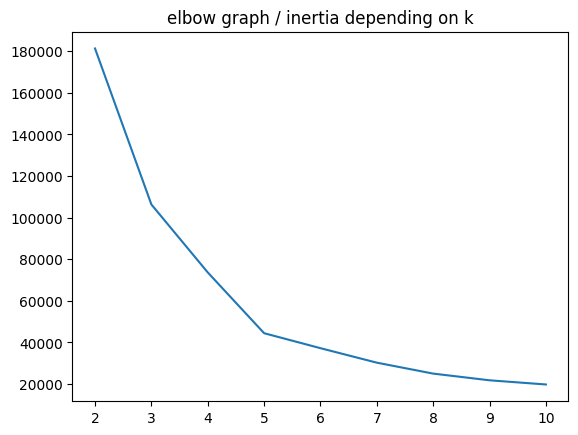

In [15]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k,n_init=10).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

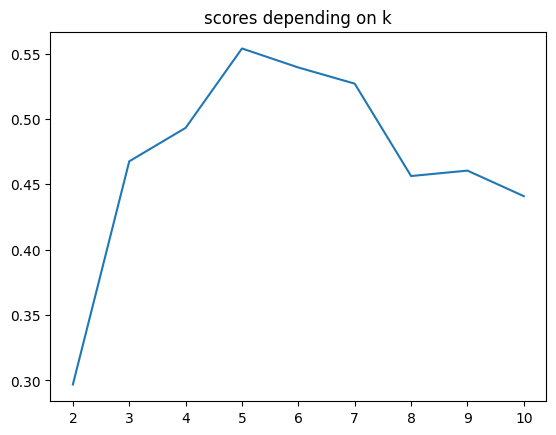

In [17]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

Now let's apply K-means on more than 2 features.

In [18]:
X = df.iloc[:, -3:]

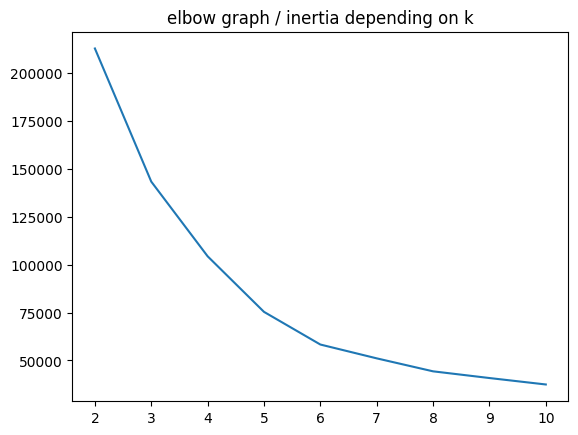

In [21]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k,n_init=10).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot(x=range(2, 11),y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

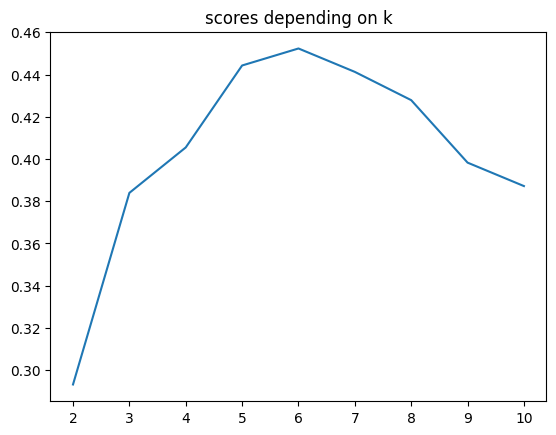

In [22]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [40]:
km = KMeans(n_clusters=5,n_init=10).fit(X)

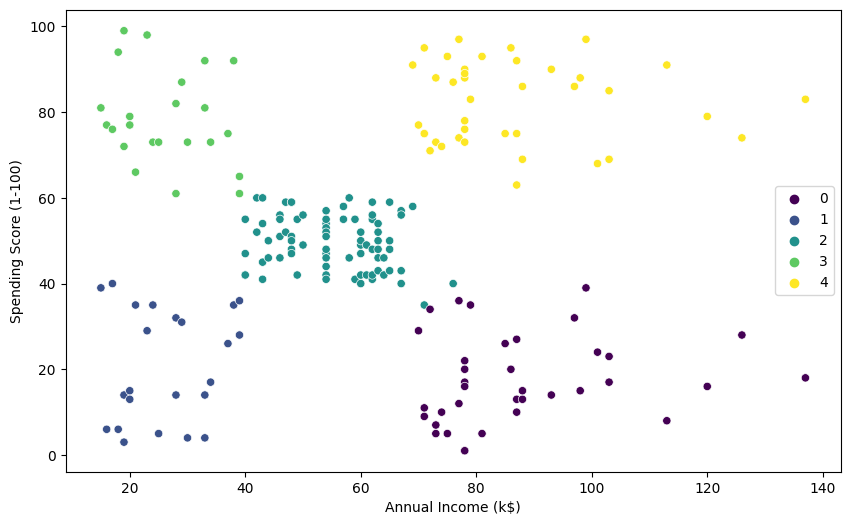

In [26]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1],y= X.iloc[:, 2], hue=km.labels_,palette='viridis')
plt.show()

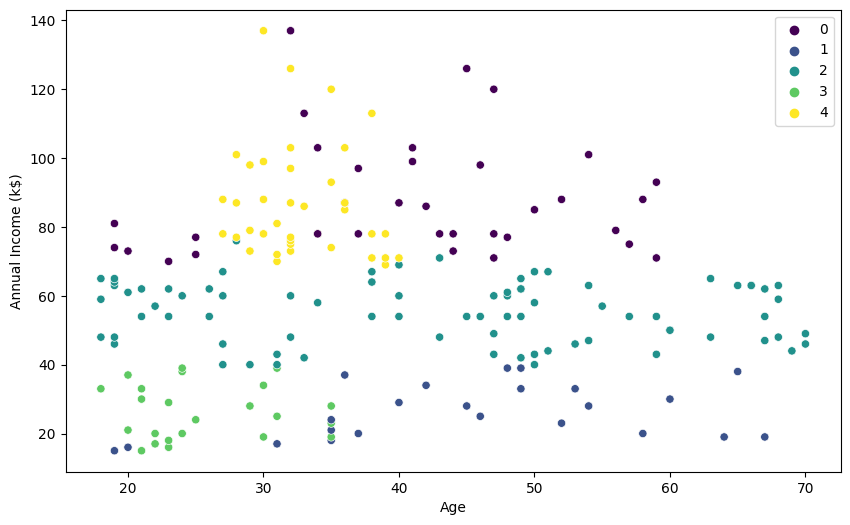

In [27]:
# K-Means visualization on another pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0],y= X.iloc[:, 1], hue=km.labels_,palette='viridis')
plt.show()

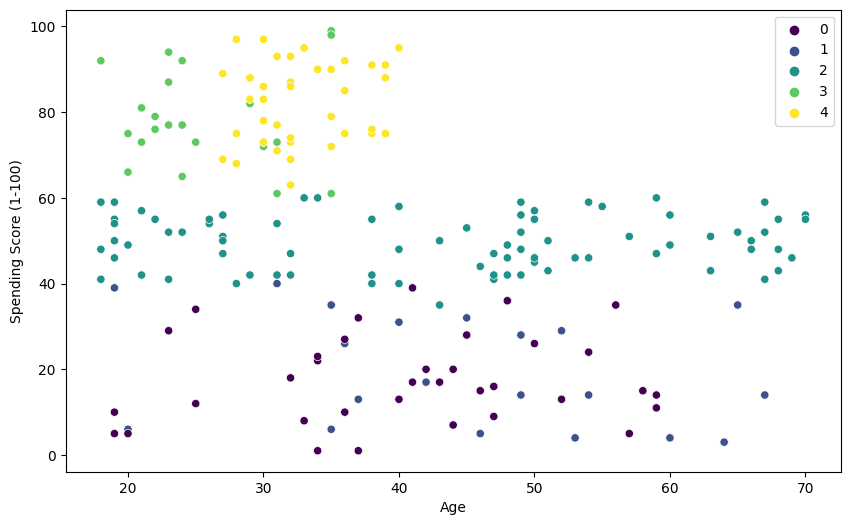

In [28]:
# K-Means visualization on the last pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0],y= X.iloc[:, 2], hue=km.labels_,palette='viridis')
plt.show()

## Visualization  of the clusters in a 3D scatter plot.

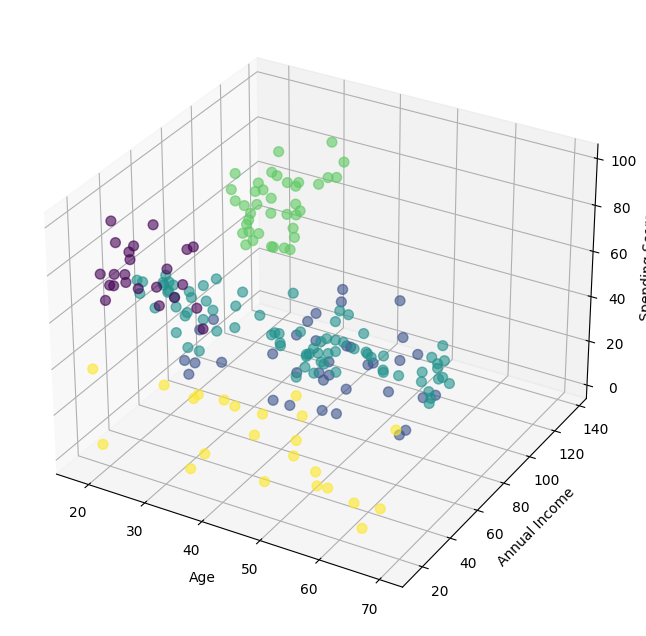

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()


This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly 5 segments of Customers based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

## Definition of customers profiles corresponding to each clusters

In [30]:
# Profiles of customers
X['label'] = km.labels_

In [31]:
X.label.value_counts()

2    79
4    39
0    36
1    23
3    23
Name: label, dtype: int64

In [32]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  36.000000               36.00               36.000000
mean   40.666667               87.75               17.583333
min    19.000000               70.00                1.000000
max    59.000000              137.00               39.000000



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   45.217391           26.304348               20.913043
min    19.000000           15.000000                3.000000
max    67.000000           39.000000               40.000000



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  79.000000           79.000000                79.00000
mean   43.088608           55.291139                49.56962
min    18.000000           40.000000                35.00000
max    70.000000           76.000000                60.00000



cluster nb : 3
             Age

In [33]:
X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Age,Annual Income (k$),Spending Score (1-100)
count,23.000000,23.000000,23.000000
mean,45.217391,26.304348,20.913043
min,19.000000,15.000000,3.000000
max,67.000000,39.000000,40.000000


---

[39.5, 18.0, 19.5, 11.5, 11.5]


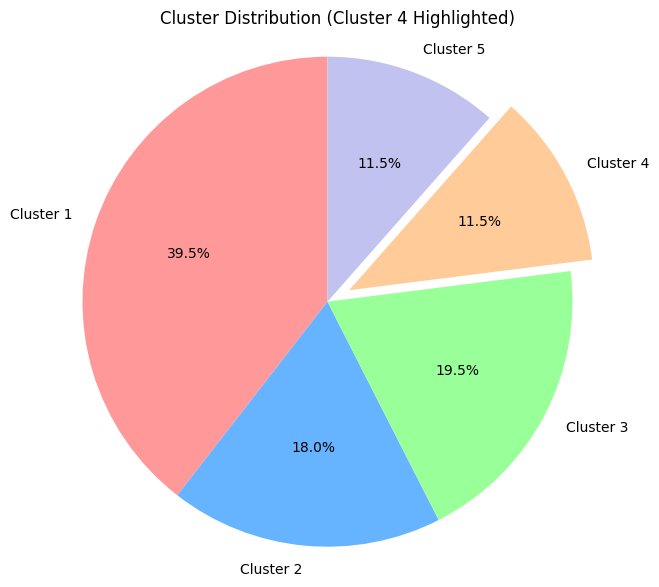

In [43]:
import matplotlib.pyplot as plt

cluster_counts = [79, 36, 39, 23, 23]
total_count = sum(cluster_counts)
cluster_percentages = [(count / total_count) * 100 for count in cluster_counts]
print(cluster_percentages)

plt.figure(figsize=(7, 7))

explode = [0, 0, 0, 0.1, 0]

plt.pie(cluster_percentages, labels=[f'Cluster {i+1}' for i in range(len(cluster_percentages))], 
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], explode=explode)

plt.title('Cluster Distribution (Cluster 4 Highlighted)')
plt.axis('equal')
plt.show()


## Key Findings:
- **Cluster 0**: High-income customers with **moderate spending** (11.5% of the dataset).  
  **Impact**: This group represents potential high-value customers, where targeted promotions could boost spending, increasing overall revenue.
  
- **Cluster 1**: Customers with **low spending** and **medium income** (3.6% of the dataset).  
  **Impact**: These customers are underperforming. Special engagement strategies like personalized offers or discounts could help increase their spending.
  
- **Cluster 2**: Customers with **high spending** and **low income** (18.8% of the dataset).  
  **Impact**: This group is spending a lot but may need financial management tools or loyalty programs to maintain their engagement. They could benefit from targeted communication about affordable options or budgeting advice.
  
- **Cluster 3**: Young customers with **low spending** (2.3% of the dataset).  
  **Impact**: This group may be in the early stages of brand interaction. Offering them incentives like discounts or rewards for their first purchase could increase their lifetime value.
  
- **Cluster 4**: Older customers with **low income** and **moderate spending** (18.8% of the dataset).  
  **Impact**: These customers might benefit from budget-friendly offers or loyalty programs that can increase their frequency of purchase, helping to maximize customer retention.
